<h1 align="center"> leverage advanced analytics in order to improve ABC Telco’s marketing campaign effectiveness. </h1>


<h2 align="right"> By Tanguy Magon </h2>

<h1>Table of Contents<span class="tocSkip"></span></h1>
</a></span></li></ul></li><li><span><a href="#Context-&amp;-objectives" data-toc-modified-id="Context-&amp;-objectives-2">Context &amp; objectives</a></span><ul class="toc-item"><li><span><a href="#Outline" data-toc-modified-id="Outline-2.1">Outline</a></span></li><li><span><a href="#Packages-import" data-toc-modified-id="Packages-import-2.2">Packages import</a></span></li></ul></li><li><span><a href="#Data-analytics" data-toc-modified-id="Data-analytics-3">Data analytics</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Statistics-check" data-toc-modified-id="Statistics-check-3.0.1">Statistics check</a></span></li><li><span><a href="#Null-values-check" data-toc-modified-id="Null-values-check-3.0.2">Null values check</a></span></li><li><span><a href="#Correlation-matrix-check" data-toc-modified-id="Correlation-matrix-check-3.0.3">Correlation matrix check</a></span></li><li><span><a href="#Data-Visualisation" data-toc-modified-id="Data-Visualisation-3.0.4">Data Visualisation</a></span></li></ul></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4">Data preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Transform-data-for-modelling" data-toc-modified-id="Transform-data-for-modelling-4.0.1">Transform data for modelling</a></span></li><li><span><a href="#Create-two-dataframes-for-the-two-models" data-toc-modified-id="Create-two-dataframes-for-the-two-models-4.0.2">Create two dataframes for the two models</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4.0.3">PCA</a></span></li><li><span><a href="#Kmeans-Algorithm" data-toc-modified-id="Kmeans-Algorithm-4.0.4">Kmeans Algorithm</a></span></li><li><span><a href="#Kmeans-on-pilot_data_called" data-toc-modified-id="Kmeans-on-pilot_data_called-4.0.5">Kmeans on <code>pilot_data_called</code></a></span></li><li><span><a href="#Kmeans-on-pilot_data_not_called" data-toc-modified-id="Kmeans-on-pilot_data_not_called-4.0.6">Kmeans on <code>pilot_data_not_called</code></a></span></li></ul></li></ul></li><li><span><a href="#Training-models" data-toc-modified-id="Training-models-5">Training models</a></span><ul class="toc-item"><li><span><a href="#Training-on-pilot_data_called" data-toc-modified-id="Training-on-pilot_data_called-5.1">Training on <code>pilot_data_called</code></a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1.1"><strong>Logistic Regression</strong></a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-5.1.2"><strong>XGBoost Classifier</strong></a></span></li><li><span><a href="#Catboost-Classifier" data-toc-modified-id="Catboost-Classifier-5.1.3"><strong>Catboost Classifier</strong></a></span></li><li><span><a href="#Best-model-for-pilot_data_called:" data-toc-modified-id="Best-model-for-pilot_data_called:-5.1.4">Best model for <code>pilot_data_called</code>:</a></span></li></ul></li><li><span><a href="#Training-on-pilot_data_not_called" data-toc-modified-id="Training-on-pilot_data_not_called-5.2">Training on <code>pilot_data_not_called</code></a></span><ul class="toc-item"><li><span><a href="#Logistique-Regression" data-toc-modified-id="Logistique-Regression-5.2.1"><strong>Logistique Regression</strong></a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-5.2.2"><strong>XGBoost Classifier</strong></a></span></li><li><span><a href="#Catboost-Classifier" data-toc-modified-id="Catboost-Classifier-5.2.3"><strong>Catboost Classifier</strong></a></span></li><li><span><a href="#Best-model-for-pilot_data_not_called" data-toc-modified-id="Best-model-for-pilot_data_not_called-5.2.4">Best model for <code>pilot_data_not_called</code></a></span></li></ul></li></ul></li><li><span><a href="#Apply-models" data-toc-modified-id="Apply-models-6">Apply models</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-6.0.1">Data processing</a></span></li><li><span><a href="#Get-predictions" data-toc-modified-id="Get-predictions-6.0.2">Get predictions</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6.1">Conclusion</a></span></li><li><span><a href="#Profit" data-toc-modified-id="Profit-6.2">Profit</a></span></li></ul></li></ul></div>

# Context & objectives

The aim of this study is to maximise the profit of ABC Telco’s marketing campaign. To do so, we have a database which contains customer's characteristics as well as two supplementary columns. One to inform if the customer has been contacted by the marketing campaign or not and the other to inform if the customer bought the product of the campaign.
Therefore, to maximize the profit, one can determine the share of customers who has to be called to buy the offer.  
The logic behind it is that we must not contact a customer if it is not necessary. In other terms, we will not contact the customer's profile who bought the product without being called as well as the customer's profil who has been called and did not buy the product.  
We can split our database in two for building two models:  
The first one will be based on customers whos have not been contacted by the campaign. It will allow us to define the share of customers who buy the product without being called and therefore delete it from our campaign.  
The second one will be based on customers whos have been contacted by the campaign. It will allow us to know which customers remaining from the first model will be buying the product once called.  


## Packages import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Data analytics

In [2]:
pilot_data = pd.read_csv('pilot.csv')
print('The pilot_data has %d rows and %d columns' %(pilot_data.shape[0],pilot_data.shape[1]))

The pilot_data has 5000 rows and 22 columns


In [3]:
pilot_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,treatment,purchase
0,2.60,A,0.72,0.36,99.81,5.80,47.75,0.04,1.07,10.93,...,0.21,0.18,8,0.29,0.14,0,D,8.63,0,0
1,0.64,A,0.84,0.18,28.60,2.26,47.29,0.98,3.95,8.55,...,0.07,7.03,8,0.14,1.49,0,F,22.72,0,0
2,0.49,A,0.80,0.24,48.22,1.83,43.96,0.02,3.14,12.91,...,0.41,13.45,7,0.10,0.01,0,B,30.26,0,0
3,1.02,A,0.34,0.51,9.06,1.60,44.81,0.17,0.01,9.88,...,0.82,0.78,12,0.21,1.13,0,C,13.21,0,0
4,0.76,A,0.11,0.44,36.68,0.28,46.95,0.38,1.67,5.50,...,0.68,1.71,10,0.59,3.69,0,A,16.62,1,0


### Statistics check
<a id="stat"></a>

In [4]:
pilot_data.describe()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V20,treatment,purchase
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,1.772064,0.498714,0.500784,249.592384,1.627994,45.283302,0.497380,2.408698,9.783438,14.250200,660.079574,0.495098,9.085482,8.852200,0.497088,2.101270,0.02820,19.959384,0.199400,0.083400
std,1.770244,0.287443,0.288586,1037.410953,1.630124,4.628341,0.287731,2.391362,3.208842,3.760642,2937.740504,0.289376,31.053813,2.995689,0.289229,2.102036,0.16556,6.776193,0.399589,0.276514
min,0.000000,0.000000,0.000000,0.050000,0.000000,27.870000,0.000000,0.000000,0.000000,2.000000,0.090000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.500000,0.250000,0.250000,12.987500,0.470000,42.240000,0.250000,0.710000,7.630000,12.000000,23.627500,0.247500,0.550000,7.000000,0.250000,0.600000,0.00000,15.320000,0.000000,0.000000
50%,1.215000,0.500000,0.500000,47.485000,1.130000,45.290000,0.500000,1.720000,9.740000,14.000000,91.405000,0.490000,1.860000,9.000000,0.500000,1.430000,0.00000,19.910000,0.000000,0.000000
75%,2.500000,0.750000,0.750000,160.522500,2.272500,48.390000,0.750000,3.282500,11.940000,17.000000,347.915000,0.740000,6.152500,11.000000,0.750000,2.940000,0.00000,24.542500,0.000000,0.000000
max,17.010000,1.000000,1.000000,44044.760000,16.060000,62.620000,1.000000,19.500000,22.170000,30.000000,90322.270000,1.000000,875.100000,21.000000,1.000000,18.670000,1.00000,47.390000,1.000000,1.000000


### Null values check 
<a id="null"></a>

In [5]:
pilot_data.isnull().sum().max()

0

That's perfect ! 

### Correlation matrix check
<a id="correl"></a>

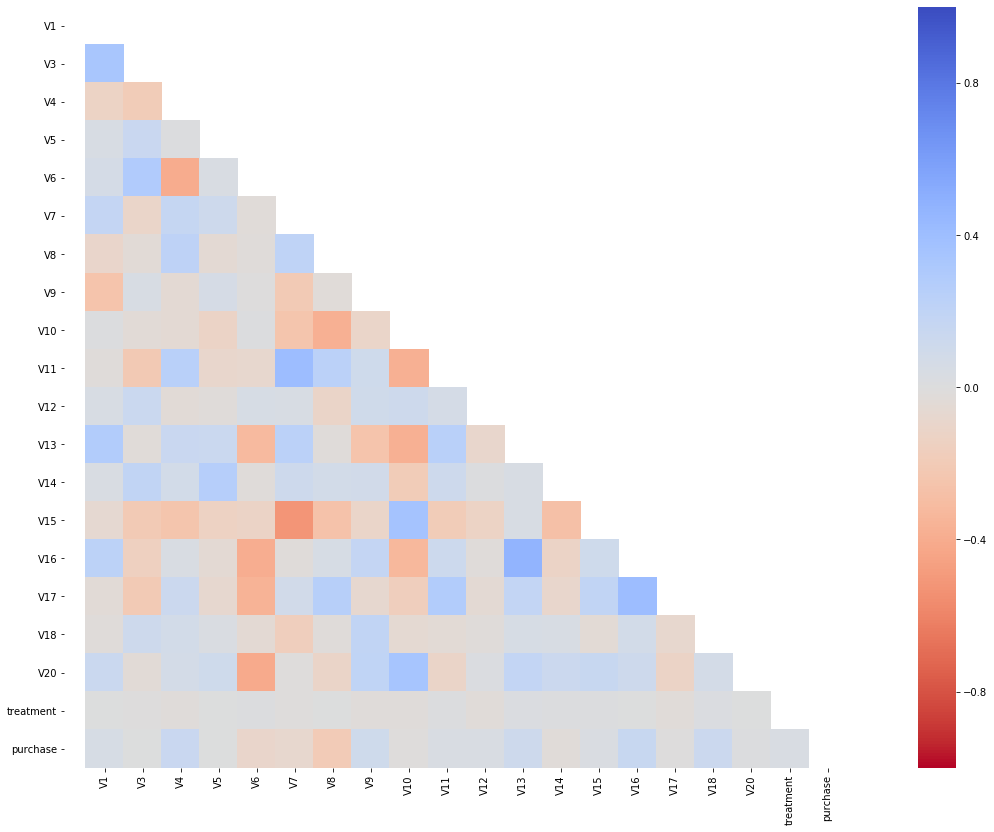

In [6]:
f, ax = plt.subplots(1, 1, figsize=(18,14))

corr = pilot_data._get_numeric_data().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax, vmin=-1, vmax=1, mask=mask)
plt.axis('equal')
plt.yticks(rotation=0)
plt.show()

As we can wee, the are some negative correlation between `V7` and `V15`, `V14` and `V15` but since the absolute coefficient correlation is not superior to 0.5 we don't remove those variables.

### Data Visualisation
<a id="viz"></a>

In [7]:
# transform into categorical for plot purpose
pilot_data['V18'] = pilot_data.V18.astype('category')

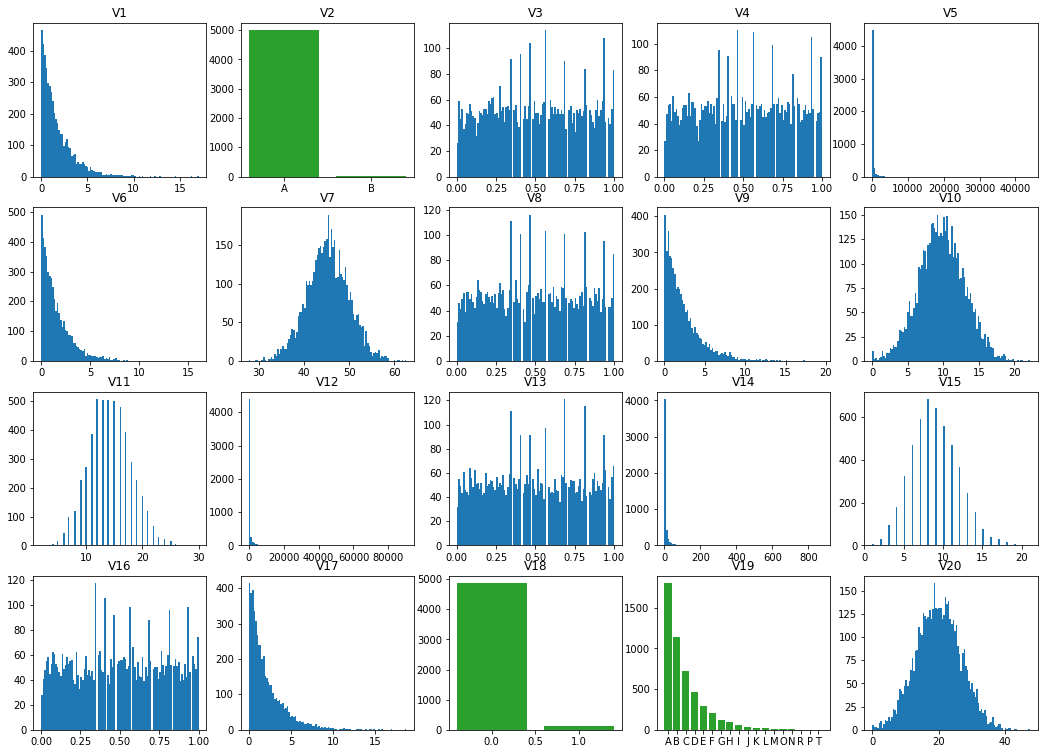

In [8]:
fig, axes = plt.subplots(4,5, figsize=(18,13))
for var, ax in zip(pilot_data.columns.drop('treatment', 'purchase'), axes.flatten()):
    if (pilot_data[var].dtype == np.float64 or pilot_data[var].dtype == np.int64):
        ax.hist(pilot_data[var], bins=100)
    else:
        ax.bar(pilot_data[var].value_counts().index, pilot_data[var].value_counts(), color='C2')
    ax.set_title(var)
plt.subplots_adjust()
plt.show()

The database seems to contains three categorical variables : `V2`, `V18` and `V19`. `V16` and `V20` can aslo be categorical variables, we will treat them later. We can remark that `V5`, `V12` and `V14` contains some outliers, we will also have to treat them.

In [9]:
#re transform after the plot
pilot_data['V18'] = pilot_data.V18.astype('int64')

# Data preprocessing

### Transform data for modelling
<a id="trans"></a>

`V2` can be drop because it has no correlation with the target variable

In [10]:
pilot_data.groupby('V2')['purchase'].value_counts()

V2  purchase
A   0           4572
    1            417
B   0             11
Name: purchase, dtype: int64

In [11]:
pilot_data.drop('V2', axis=1, inplace=True)

As `V19` has to many category, I decided to create an "Other" category thats gather the category after the letter F

In [12]:
pilot_data.loc[pilot_data.V19>'F', 'V19'] = 'Others'

For reducing outliers and to reduce the skewness of the variables, I log transformed the variables `V5`, `V12` and `V14`

In [13]:
pilot_data.V5 = np.log(pilot_data.V5  + 1)
pilot_data.V12 = np.log(pilot_data.V12 + 1)
pilot_data.V14 = np.log(pilot_data.V14 + 1)

### Create two dataframes for the two models
<a id="df2"></a>

Split dataset into two groups: one group where customers has been called and one where customers has not been called

In [14]:
# targeted customers
pilot_data_called = pilot_data.loc[pilot_data.treatment==1].copy()
pilot_data_called.drop('treatment', axis=1, inplace=True)
pilot_data_called.reset_index(drop=True, inplace=True)
# other customers
pilot_data_not_called = pilot_data.loc[pilot_data.treatment==0].copy()
pilot_data_not_called.drop('treatment', axis=1, inplace=True)
pilot_data_not_called.reset_index(drop=True, inplace=True)

Transform `V19` feature to dummies for algorithms which does not handle categorical features

In [15]:
pilot_data_dummies = pd.get_dummies(pilot_data)

In [16]:
pilot_data_dummies.head()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,treatment,purchase,V19_A,V19_B,V19_C,V19_D,V19_E,V19_F,V19_Others
0,2.60,0.72,0.36,4.613238,5.80,47.75,0.04,1.07,10.93,11,...,8.63,0,0,0,0,0,1,0,0,0
1,0.64,0.84,0.18,3.387774,2.26,47.29,0.98,3.95,8.55,15,...,22.72,0,0,0,0,0,0,0,1,0
2,0.49,0.80,0.24,3.896300,1.83,43.96,0.02,3.14,12.91,18,...,30.26,0,0,0,1,0,0,0,0,0
3,1.02,0.34,0.51,2.308567,1.60,44.81,0.17,0.01,9.88,14,...,13.21,0,0,0,0,1,0,0,0,0
4,0.76,0.11,0.44,3.629129,0.28,46.95,0.38,1.67,5.50,18,...,16.62,1,0,1,0,0,0,0,0,0


In [17]:
# targeted customers
pilot_data_dummies_called = pilot_data_dummies.loc[pilot_data_dummies.treatment==1].copy()
pilot_data_dummies_called.drop('treatment', axis=1, inplace=True)
pilot_data_dummies_called.reset_index(drop=True, inplace=True)
# other customers
pilot_data_dummies_not_called = pilot_data_dummies.loc[pilot_data_dummies.treatment==0].copy()
pilot_data_dummies_not_called.drop('treatment', axis=1, inplace=True)
pilot_data_dummies_not_called.reset_index(drop=True, inplace=True)

### PCA

A PCA can be usefull for having a good idea of how the data looks like and can make the data easy to explore and visualize.

In [95]:
from sklearn import decomposition

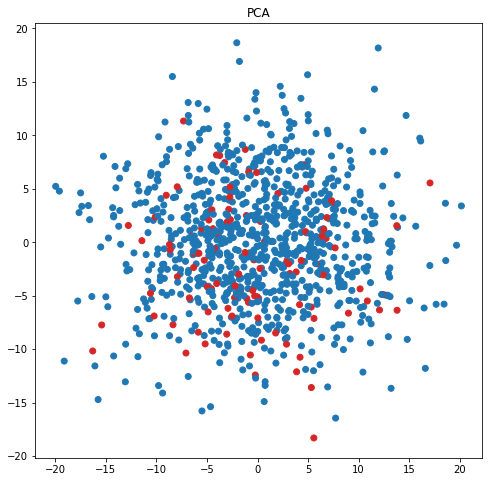

In [96]:
X = pilot_data_dummies_called.drop(['purchase'], axis=1)
y = pilot_data_dummies_called['purchase']

#le = LabelEncoder()
#X.V19 = le.fit_transform(X.V19)
#X.V19 = X.V19.astype('int64')

f, ax = plt.subplots(1,1, figsize=(8, 8))

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

ax.set_title('PCA')
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y.replace(0,'C0').replace(1,'C3'))

plt.show()

On this PCA plot we colored points by purchase value. We can see that none of the axes can split the two colors. 

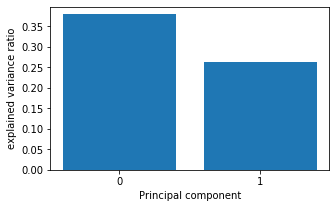

In [97]:
fig = plt.figure(figsize=(5, 3))

ratios = pca.explained_variance_ratio_

plt.bar(range(len(ratios)), pca.explained_variance_ratio_)
plt.xticks(range(len(ratios)))
plt.xlabel("Principal component")
plt.ylabel("explained variance ratio")
plt.show()

### Kmeans Algorithm
<a id="km"></a>

### Kmeans on `pilot_data_called`

For a classification problem, I always apply a kmeans algorithm to see how the problem is complex and if kmeans manage to separate well the data.

In [24]:
X = pilot_data_dummies_called.drop(['purchase'], axis=1)
y = pilot_data_dummies_called['purchase']

#le = LabelEncoder()
#X.V19 = le.fit_transform(X.V19)
#X.V19 = X.V19.astype('int64')

# Kmeans
t0 = time.time()
km = KMeans(n_clusters=2,random_state=0,algorithm="auto",max_iter=10000,n_jobs=-1)
km.fit(X.values)
X_reduced_kmeans = pd.DataFrame(km.fit_transform(X.values))
t1 = time.time()
print("Kmeans took %.2f sec." %(t1 - t0))

Kmeans took 4.02 sec.


In [25]:
X_reduced_kmeans.head()

,0,1
0,11.575534,6.186244
1,14.728164,10.619884
2,7.253915,9.516947
3,13.376171,5.647327
4,7.188096,9.785791


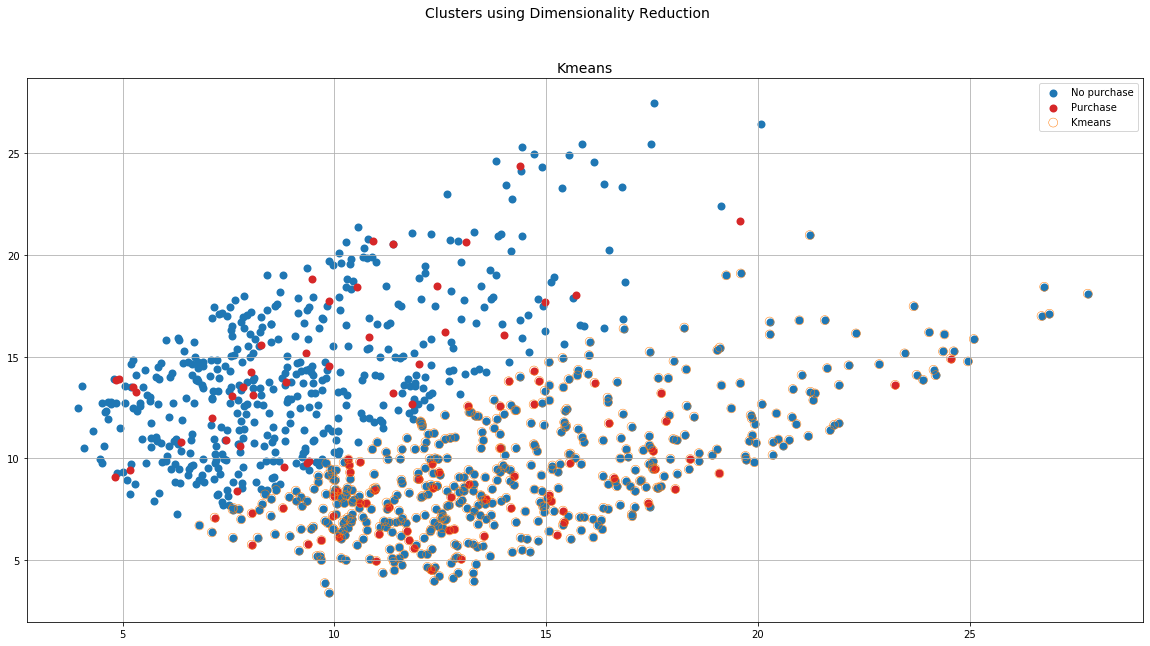

In [26]:
f, ax = plt.subplots(1, 1, figsize=(20,10))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

ax.scatter(X_reduced_kmeans.loc[y==0,0], X_reduced_kmeans.loc[y==0,1], c='C0', label='No purchase', linewidths=2)
ax.scatter(X_reduced_kmeans.loc[y==1,0], X_reduced_kmeans.loc[y==1,1], c='C3', label='Purchase', linewidths=2)
ax.scatter(X_reduced_kmeans.loc[km.labels_==1,0], X_reduced_kmeans.loc[km.labels_==1,1], facecolors='none', label='Kmeans', linewidths=.5, edgecolor="C1", s=80)
ax.set_title('Kmeans', fontsize=14)

ax.grid(True)
ax.legend()

plt.show()

### Kmeans on `pilot_data_not_called`

In [27]:
X = pilot_data_dummies_not_called.drop(['purchase'], axis=1)
y = pilot_data_dummies_not_called['purchase']
                     
#le = LabelEncoder()
#X.V19 = le.fit_transform(X.V19)
#X.V19 = X.V19.astype('int64')

# Kmeans
t0 = time.time()
km = KMeans(n_clusters=2,random_state=0,algorithm="auto",max_iter=10000,n_jobs=-1)
km.fit(X.values)
X_reduced_kmeans = pd.DataFrame(km.fit_transform(X.values))
t1 = time.time()
print("Kmeans took %.2f sec" %(t1 - t0))

Kmeans took 0.26 sec


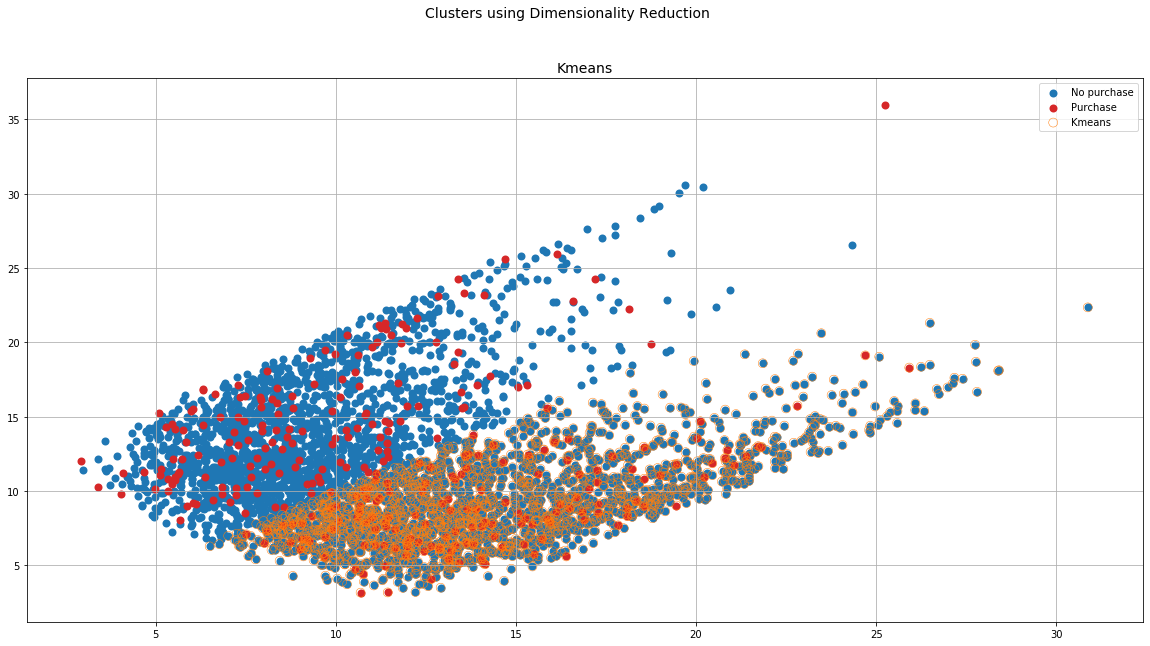

In [28]:
f, ax = plt.subplots(1, 1, figsize=(20,10))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

ax.scatter(X_reduced_kmeans.loc[y==0,0], X_reduced_kmeans.loc[y==0,1], c='C0', label='No purchase', linewidths=2)
ax.scatter(X_reduced_kmeans.loc[y==1,0], X_reduced_kmeans.loc[y==1,1], c='C3', label='Purchase', linewidths=2)
ax.scatter(X_reduced_kmeans.loc[km.labels_==1,0], X_reduced_kmeans.loc[km.labels_==1,1], facecolors='none', label='Kmeans', linewidths=.5, edgecolor="C1", s=80)
ax.set_title('Kmeans', fontsize=14)

ax.grid(True)
ax.legend()

plt.show()

As we can see, the Kmeans algorithm can't split the data as we wanted to.  
The classification problem may be difficult. Let's see what we can do with supervised methods.

# Training models

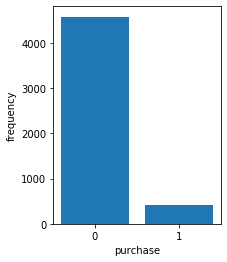

In [101]:
plt.figure(figsize=(3,4))
plt.bar(pilot_data['purchase'].astype(str).value_counts().index, pilot_data['purchase'].astype(str).value_counts())
plt.xlabel('purchase')
plt.ylabel('frequency')
plt.show()

The target variable is highly unbalenced so we need to add a `class_weight` parameter in each of our models in order to balance it and avoid overfitting.  
Furthermore, we need to choose the right metric for this kind of classification problem.  
I chose `F1 score` and `recall` as my principal metrics but aslo the precision which is always good to control.

Precision: $\dfrac{tp}{tp+fp}$  
Recall: $\dfrac{tp}{tp+fn}$  
F1-score: $2\times\dfrac{(\text{precision}\times\text{recall})}{(\text{precision}+\text{recall})}$

## Training on `pilot_data_called`
<a id="called"></a>

In [18]:
X = pilot_data_dummies_called.drop('purchase', axis=1).copy()
y = pilot_data_dummies_called['purchase']

In [19]:
y.value_counts()

0    895
1    102
Name: purchase, dtype: int64

In [20]:
# we use stratify=y here to have a balenced distribution of target into the train and the test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

### __Logistic Regression__

In [24]:
# fitting the parameters
params = {
    "penalty": ['l2'], 
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

t0 = time.time()
log_reg = GridSearchCV(LogisticRegression(max_iter=1000, 
                                          class_weight='balanced' # class_weight='balanced' to control the unbalanced target
                                         ), 
                       params, 
                       cv=5)

log_reg.fit(X_train, y_train) # fit on train set
t1 = time.time()
print("Fitting data took: %.2f sec" %(t1 - t0))
y_pred_log_reg = log_reg.predict(X_test) # predict on test set

Fitting data took: 13.80 sec


In [25]:
log_reg.best_params_  #print the best parameters

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}

In [26]:
print('Logistic Regression Train:')
print(classification_report(y_train,  log_reg.predict(X_train)))
print('Logistic Regression Test:')
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       599
           1       0.27      0.78      0.40        68

    accuracy                           0.77       667
   macro avg       0.62      0.77      0.63       667
weighted avg       0.90      0.77      0.81       667

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       296
           1       0.23      0.65      0.34        34

    accuracy                           0.74       330
   macro avg       0.59      0.70      0.59       330
weighted avg       0.87      0.74      0.78       330



In [27]:
pd.DataFrame(confusion_matrix(y_test, y_pred_log_reg)) # print the confusion matrix

,0,1
0,221,75
1,12,22


In [28]:
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:,1] #get the proba of the predictions

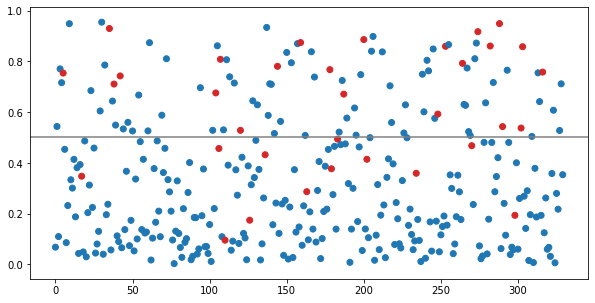

In [29]:
#plot the probabilities with the threshold 
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_pred_log_reg_proba, c=y_test.replace(0,'C0').replace(1,'C3'))
plt.axhline(y=.5, c='grey')
plt.show()

### __XGBoost Classifier__

In [43]:
#{'gamma': 4,
# 'learning_rate': 0.1,
# 'max_depth': 1,
# 'min_child_weight': 10,
# 'n_estimators': 800,
# 'subsample': 0.6}



params = {
    'learning_rate' : [0.02, 0.03, 0.1],
    'min_child_weight': [10, 12,15,20],
    'gamma': [0.5, 1, 2, 3, 4],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators' : [100, 300, 600, 800],
    'max_depth': [1, 3, 8]    
}
t0 = time.time()
xgb = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', nthread=4, seed=27, scale_pos_weight=100, cv=5),
                   param_grid=params, scoring='f1', n_jobs=4, iid=False)
xgb.fit(X_train, y_train)
t1 = time.time()
print("Fitting data took: %.2f sec" %(t1 - t0))
y_pred_xgb = xgb.predict(X_test)

Fitting data took: 2322.85 sec


In [45]:
print('XGBoost Train:')
print(classification_report(y_train,  xgb.predict(X_train)))
print('XGBoost Test:')
print(classification_report(y_test, y_pred_xgb))

XGBoost Train:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90       599
           1       0.40      1.00      0.57        68

    accuracy                           0.84       667
   macro avg       0.70      0.91      0.74       667
weighted avg       0.94      0.84      0.87       667

XGBoost Test:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       296
           1       0.24      0.56      0.33        34

    accuracy                           0.77       330
   macro avg       0.59      0.68      0.60       330
weighted avg       0.87      0.77      0.81       330



In [46]:
pd.DataFrame(confusion_matrix(y_test, y_pred_xgb))

,0,1
0,235,61
1,15,19


In [47]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

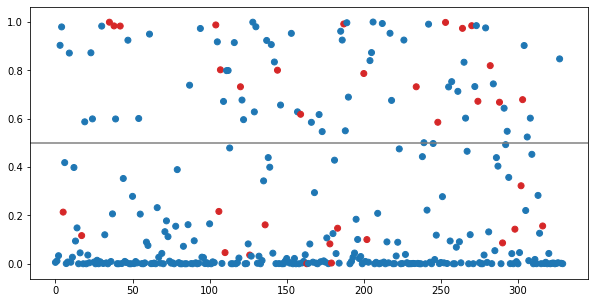

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_pred_proba_xgb, c=y_test.replace(0,'C0').replace(1,'C3'))
plt.axhline(y=.5, c='grey')
plt.show()

### __Catboost Classifier__

With CatBoost Classifier I used the data without applying dummies because Catboost handle pretty well the categorical variables

In [103]:
X = pilot_data_called.drop('purchase', axis=1).copy()
y = pilot_data_called['purchase']

In [104]:
y.value_counts()

0    895
1    102
Name: purchase, dtype: int64

In [105]:
# we use stratify=y here to have a balenced distribution of target into the train and the test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [106]:
# we define the categorical variables in order to specify it in the model
categorical_features_indices = [customer_data.columns.get_loc(c) for c in ['V18', 'V19'] if c in customer_data.columns]
print(categorical_features_indices)
print(X.columns[categorical_features_indices].values)

[16, 17]
['V18' 'V19']


In [34]:
params = {
    'learning_rate' : [0.1, 0.2, 0.3],
    'l2_leaf_reg': [1, 3],
    'depth': [ 5, 12, 13]   
}
t0 = time.time()
cb = GridSearchCV(estimator=CatBoostClassifier(iterations=1000, class_weights=[1, 10], loss_function='Logloss', eval_metric='F1', random_seed=42, verbose=0, use_best_model=True), 
                  param_grid=params, scoring='f1', n_jobs=4, iid=False)

cb.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test,y_test))
t1 = time.time()
print("Fitting data took: %.2f sec" %(t1 - t0))
y_pred_cb = cb.predict(X_test)

Fitting data took: 13819.33 sec


In [35]:
cb.best_params_

{'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [107]:
cb = CatBoostClassifier(iterations=1000, 
                        class_weights=[1, 10], 
                        loss_function='Logloss', 
                        learning_rate=0.1,
                        depth=5,
                        l2_leaf_reg=1,
                        random_seed=42, 
                        verbose=0, eval_metric='F1',
                        use_best_model=True)
cb.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test,y_test))
y_pred_cb = cb.predict(X_test)

In [108]:
print('Catboost Train:')
print(classification_report(y_train,  cb.predict(X_train)))
print('Catboost Test:')
print(classification_report(y_test, y_pred_cb))

Catboost Train:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       599
           1       0.26      0.91      0.41        68

    accuracy                           0.73       667
   macro avg       0.62      0.81      0.62       667
weighted avg       0.91      0.73      0.78       667

Catboost Test:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       296
           1       0.24      0.76      0.36        34

    accuracy                           0.72       330
   macro avg       0.60      0.74      0.59       330
weighted avg       0.89      0.72      0.78       330



In [109]:
pd.DataFrame(confusion_matrix(y_test, y_pred_cb))

,0,1
0,213,83
1,8,26


In [110]:
y_pred_proba_cb = cb.predict_proba(X_test)[:,1]

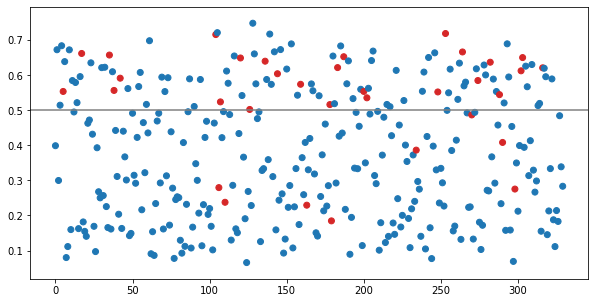

In [111]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_pred_proba_cb, c=y_test.replace(0,'C0').replace(1,'C3'))
plt.axhline(y=.5, c='grey')
plt.show()

### Best model for `pilot_data_called`:

In [112]:
best_model_called = cb

## Training on `pilot_data_not_called`
<a id="notcalled"></a>

In [113]:
X = pilot_data_dummies_not_called.drop('purchase', axis = 1).copy()
y = pilot_data_dummies_not_called['purchase']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

### __Logistique Regression__

In [50]:
params = {
    "penalty": ['l2'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

t0 = time.time()
log_reg = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
log_reg.fit(X_train, y_train)
t1 = time.time()
print("Fitting data took: %.2f sec" %(t1 - t0))
y_pred_log_reg = log_reg.predict(X_test)

Fitting data took: 35.97 sec


In [51]:
log_reg.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [52]:
print('Logistique Train:')
print(classification_report(y_train,  log_reg.predict(X_train)))
print('Logistique Test:')
print(classification_report(y_test, y_pred_log_reg))

Logistique Train:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      2471
           1       0.25      0.83      0.38       211

    accuracy                           0.79      2682
   macro avg       0.61      0.81      0.63      2682
weighted avg       0.92      0.79      0.83      2682

Logistique Test:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1217
           1       0.23      0.74      0.35       104

    accuracy                           0.78      1321
   macro avg       0.60      0.76      0.61      1321
weighted avg       0.91      0.78      0.83      1321



In [53]:
pd.DataFrame(confusion_matrix(y_test, y_pred_log_reg))

,0,1
0,955,262
1,27,77


### __XGBoost Classifier__

In [ ]:
params = {
    'min_child_weight': [1, 3,  5, 10],
    'gamma': [0.2, 0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 6, 8,10]
}
params = {
    'min_child_weight': [1, 3,  5],
    'n_estimators' : [300, 400],
    'max_depth': [3, 10]    
}
t0 = time.time()
xgb = GridSearchCV(estimator=XGBClassifier(learning_rate=0.02, objective='binary:logistic', nthread=4, seed=27, scale_pos_weight=10),
                           param_grid=params, scoring='f1', n_jobs=4, iid=False, cv=5)
xgb.fit(X_train, y_train)
t1 = time.time()
print("Fitting data took: %.2f sec" %(t1 - t0))
#print(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)
y_pred_xgb = xgb.predict(X_test)

In [54]:
xgb = XGBClassifier(learning_rate=0.02, 
                    objective='binary:logistic', 
                    nthread=4, seed=27, 
                    scale_pos_weight=10, 
                    max_depth=3, 
                    min_child_weight=1, 
                    n_estimators=400)
xgb = xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [55]:
print('XGBoost Train:')
print(classification_report(y_train,  xgb.predict(X_train)))
print('XGBoost Test:')
print(classification_report(y_test, y_pred_xgb))

XGBoost Train:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2471
           1       0.42      0.96      0.58       211

    accuracy                           0.89      2682
   macro avg       0.71      0.92      0.76      2682
weighted avg       0.95      0.89      0.91      2682

XGBoost Test:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1217
           1       0.29      0.60      0.39       104

    accuracy                           0.85      1321
   macro avg       0.63      0.74      0.65      1321
weighted avg       0.91      0.85      0.88      1321



In [56]:
pd.DataFrame(confusion_matrix(y_test, y_pred_xgb))

,0,1
0,1065,152
1,42,62


In [57]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

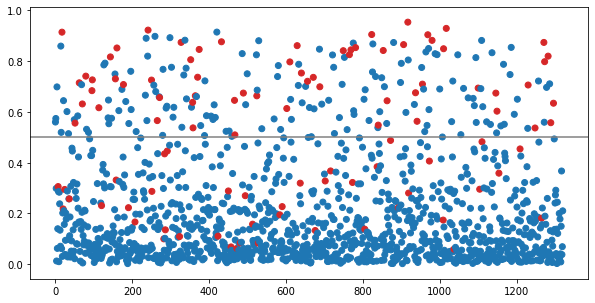

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_pred_proba_xgb, c=y_test.replace(0,'C0').replace(1,'C3'))
plt.axhline(y=.5, c='grey')
plt.show()

### __Catboost Classifier__

In [118]:
X = pilot_data_not_called.drop('purchase', axis = 1).copy()
y = pilot_data_not_called['purchase']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [120]:
categorical_features_indices = [X.columns.get_loc(c) for c in ['V18', 'V19'] if c in X.columns]
print(categorical_features_indices)
print(X.columns[categorical_features_indices].values)

[16, 17]
['V18' 'V19']


In [ ]:
params = {
    'learning_rate' : [0.1, 0.2, 0.3],
    'l2_leaf_reg': [1, 3],
    'depth': [ 5, 12, 13]   
}
t0 = time.time()
cb = GridSearchCV(estimator=CatBoostClassifier(iterations=1000, class_weights=[1, 10], loss_function='Logloss', eval_metric='F1', random_seed=42, verbose=0, use_best_model=True), 
                  param_grid=params, scoring='f1', n_jobs=4, iid=False)

cb.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test,y_test))
t1 = time.time()
print("Fitting data took: %.2f sec" %(t1 - t0))
y_pred_cb = cb.predict(X_test)

In [121]:
cb = CatBoostClassifier(iterations=1000, 
                        class_weights=[1, 10], 
                        loss_function='Logloss', 
                        learning_rate=0.1,
                        depth=12,
                        l2_leaf_reg=3,
                        eval_metric='F1',
                        random_seed=42, 
                        verbose=0, 
                        use_best_model=True)
cb.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test,y_test))
y_pred_cb = cb.predict(X_test)

In [122]:
print('Catboost Train:')
print(classification_report(y_train,  cb.predict(X_train)))
print('Catboost Test:')
print(classification_report(y_test, y_pred_cb))

Catboost Train:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2471
           1       0.65      1.00      0.79       211

    accuracy                           0.96      2682
   macro avg       0.83      0.97      0.88      2682
weighted avg       0.97      0.96      0.96      2682

Catboost Test:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1217
           1       0.32      0.46      0.37       104

    accuracy                           0.88      1321
   macro avg       0.63      0.69      0.65      1321
weighted avg       0.90      0.88      0.89      1321



In [123]:
pd.DataFrame(confusion_matrix(y_test, y_pred_cb))

,0,1
0,1113,104
1,56,48


In [124]:
y_pred_proba_cb = cb.predict_proba(X_test)[:,1]

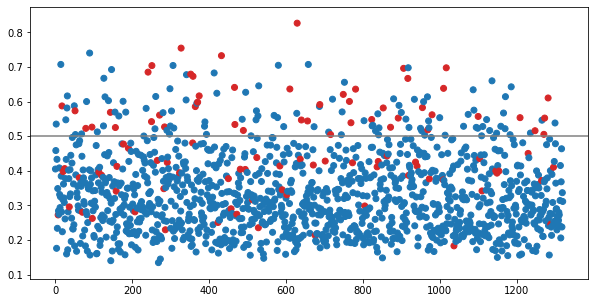

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_pred_proba_cb, c=y_test.replace(0,'C0').replace(1,'C3'))
plt.axhline(y=.5, c='grey')
plt.show()

### Best model for `pilot_data_not_called`

In [126]:
best_model_not_called = cb

# Apply models

Now that I have chose our two best models, I can apply it on the customerbase data, I will first apply the first model, remove the client predicted that will buy the product without being called.  
Then, I will apply the second model in order to predict the client that will buy after being called.  
Finally, I will apply the following formula to find the profit of the marketing campaign :   

$PROFIT(decision_1, decision_2, ... , decision_n) = \sum_{i=0}^N  100 \times purchase_i(decision_i) - 5 \times decision_i$



In [127]:
customer_data = pd.read_csv('CustomerBase.csv')
print('The customer_data has %d rows and %d columns' %(customer_data.shape[0],customer_data.shape[1]))

The customer_data has 95000 rows and 20 columns


In [128]:
customer_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
0,1.06,A,0.39,0.75,178.50,1.97,53.32,0.98,0.63,4.46,17,160.36,0.97,0.70,8,0.88,1.75,0,G,17.49
1,0.87,A,0.53,0.98,12.54,0.18,51.52,0.99,1.47,5.57,17,60.37,0.52,50.66,3,0.26,0.19,0,A,18.62
2,1.56,A,0.64,0.09,4.14,3.68,50.72,0.63,0.92,14.84,17,1768.20,0.09,0.12,9,0.34,4.13,0,L,10.04
3,2.10,A,0.10,0.52,1.65,0.57,39.78,0.07,2.27,15.26,13,119.48,0.63,0.07,15,0.89,1.06,0,A,23.62
4,1.54,A,0.21,0.27,42.66,1.30,52.05,0.30,0.22,10.96,15,630.11,0.72,0.31,8,0.77,5.91,0,D,15.06


### Data processing

In [129]:
customer_data.drop('V2', axis=1, inplace=True)
customer_data.loc[customer_data.V19>'F', 'V19'] = 'Others'
customer_data.V5 = np.log(customer_data.V5  + 1)
customer_data.V12 = np.log(customer_data.V12 + 1)
customer_data.V14 = np.log(customer_data.V14 + 1)

In [130]:
categorical_features_indices = [customer_data.columns.get_loc(c) for c in ['V18', 'V19'] if c in customer_data.columns]
print(categorical_features_indices)
print(X.columns[categorical_features_indices].values)

[16, 17]
['V18' 'V19']


### Get predictions

Apply first model (not called customers)

In [152]:
customer_data['purchase_not_called_pred'] = best_model_not_called.predict(customer_data)
customer_data.purchase_not_called_pred.value_counts()

0.0    84389
1.0    10611
Name: purchase_not_called_pred, dtype: int64

Apply second model (called customers)

In [153]:
customer_data['purchase_called_pred'] = best_model_called.predict(customer_data)
customer_data.purchase_called_pred.value_counts()

0.0    60567
1.0    34433
Name: purchase_called_pred, dtype: int64

Get customers which **does not** buy when not called and **does** buy when called:

In [135]:
customer_data['decision'] = (customer_data.purchase_not_called_pred==0) & (customer_data.purchase_called_pred==1)
customer_data['decision'].replace(True,  1, inplace=True)
customer_data['decision'].replace(False, 0, inplace=True)

## Conclusion

In [137]:
print('Number of customers to call: %d (%.2f%%)' %((customer_data.decision==1).sum(), (customer_data.decision==1).sum()/len(customer_data)*100.))

Number of customers to call: 27032 (28.45%)


This number of clients to call does not fit the restriction of $\frac{N}{4}$.  
One solution to reduce it is to increase the `best_model_called` probabilities threshold (default value is 0.5) in order to keep only the best predictions.  
Let's find this threshold!

In [200]:
max_to_call = len(customer_data)/4
print('Number max of customer to call: %d' %max_to_call)

Number max of customer to call: 23750


In [201]:
customer_data['purchase_called_pred'] = best_model_called.predict_proba(customer_data)[:,1]


In [202]:
customer_data['decision'] = customer_data.purchase_called_pred
customer_data.loc[customer_data.purchase_not_called_pred==1, 'decision'] = 0

In [203]:
customer_data_sorted = customer_data.sort_values('decision')
customer_data_sorted[-23750:].head()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V14,V15,V16,V17,V18,V19,V20,purchase_not_called_pred,purchase_called_pred,decision
35882,0.80,0.65,0.10,4.494015,3.73,37.32,0.14,3.52,16.43,6,...,1.153732,9,0.07,0.03,0,B,27.89,0.0,0.521390,0.521390
34069,1.06,0.84,0.16,2.988204,2.07,45.21,0.46,4.17,8.65,16,...,0.985817,9,0.64,1.23,0,C,17.44,0.0,0.521395,0.521395
28261,0.92,0.55,0.01,1.470176,5.74,47.45,0.46,2.84,8.85,17,...,0.231112,8,0.68,0.89,0,E,10.02,0.0,0.521395,0.521395
16351,0.40,0.39,0.45,5.865334,4.45,47.76,0.22,5.69,13.58,15,...,1.324419,6,0.08,0.09,0,C,21.14,0.0,0.521402,0.521402
35386,0.13,0.09,0.26,1.774952,3.60,48.24,0.05,2.43,11.50,16,...,1.453953,8,0.02,0.02,0,B,15.87,0.0,0.521403,0.521403


In [204]:
threshold = customer_data_sorted[-23750:]['decision'].min()
print('New threshold: %.5f' %threshold)

New threshold: 0.52139


In [205]:
customer_data.loc[customer_data.decision>=threshold, 'decision'] = 1
customer_data.loc[customer_data.decision<threshold, 'decision']  = 0

In [207]:
print('New number of customers to call: %d (%.2f%%)' %((customer_data.decision==1).sum(), (customer_data.decision==1).sum()/len(customer_data)*100.))

New number of customers to call: 23750 (25.00%)


In [208]:
customer_data.decision.to_csv('decisions.csv', index=False)

## Profit

In [213]:
profit = 100*((customer_data.purchase_not_called_pred==1).sum() + (customer_data.decision==1).sum()) - 5*(customer_data.decision==1).sum()
print('Profit is equal to {:,} units.'.format(profit))

Profit is equal to 3,317,350 units.


This case was really interesting to tackle.  
I think my approach was interesting and innovative, even if the performance of the models could be better. With such performance, I would ask the client more data and more variables.  
Training a model on only 1000 observations might be too short for this kind of data.  
I decide to divide the problem in two trainings instead of using the profit maximisation problem asked because it was the way I saw it but this could be discussed.  

If I had more time, I would focus more on data preprocessing and features engineering, try other algorithms and build bigger grid searchs.  
I hope you enjoy it because I had a great time doing it and I would love to explain it in more details with you! 